<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass-Lab  <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Earthquake data)
The data records the earthquakes experienced for the last few years in the USA. There are four parameters in the data, where each data point represents an earthquake.

**Latitude**: Latitude of the place (above the equator)

**Longitude**: Longitude of the place (west of the prime meridian)

**DepthMeters**: Absolute height of the place

**Magnitude**: Magnitude of the earthquake wave

## Table of Content

1. **[Exploratory Data Analysis](#eda)**
2. **[K-means Clustering](#k-means)**
3. **[Interpret the Clusters](#inter)**

#### Import the required libraries

In [1]:
# write your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the csv file and print the first five observations.

In [4]:
# write your code here
df=pd.read_csv('Earthquake_Data.csv')
df.head()

,Latitude,Longitude,DepthMeters,Magnitude
0,39.644,-75.483,5000,2.8
1,37.379,-80.746,11500,2.8
2,45.296,-73.475,18000,2.1
3,42.825,-78.239,5000,2.4
4,38.619,-80.909,100,3.4


### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find the number of variables and the number of observations in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# write your code here
df.shape

(1647, 4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the datatype of each variable in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# write your code here
df.dtypes

Latitude       float64
Longitude      float64
DepthMeters      int64
Magnitude      float64
dtype: object

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Find if there are missing values in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# write your code here
df.isnull().sum()

Latitude       0
Longitude      0
DepthMeters    0
Magnitude      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Obtain the summary statistic of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# write your code here
df.describe()

,Latitude,Longitude,DepthMeters,Magnitude
count,1647.000000,1647.000000,1647.000000,1647.000000
mean,39.903436,-79.008111,7559.720704,2.384827
std,2.410973,3.192442,5205.963953,0.459781
min,37.007700,-82.881000,100.000000,0.200000
25%,37.902400,-81.694150,3450.000000,2.100000
50%,38.477800,-80.831400,6400.000000,2.400000
75%,41.467200,-75.934050,11500.000000,2.600000
max,45.300900,-73.063400,32300.000000,5.200000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the outliers in the dataset using boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

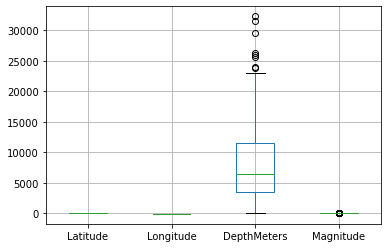

In [9]:
# write your code here
df.boxplot()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Remove the outliers using the IQR method and check the shape of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# write your code here
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

In [16]:
df.shape

(1562, 4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Drop the variables representing the geographical coordinates of the earthquake.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# write your code here
X_filtered=df.drop(['Latitude', 'Longitude'], axis=1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Transform the variables such that it will have mean 0 and standard deviation 1 and print the summary statistics.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# write your code here
from sklearn.preprocessing import StandardScaler

In [71]:
ss=StandardScaler()
num_norm=ss.fit_transform(X_filtered)
X=pd.DataFrame(num_norm, columns=X_filtered.columns)

In [72]:
X.head()

,DepthMeters,Magnitude
0,-0.488908,1.252394
1,0.803530,1.252394
2,2.095968,-0.735020
3,-0.488908,0.116729
4,-1.025767,0.116729


<a id="k-means"> </a>
## 2. K-means Clustering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find within cluster sum of squares for the number of clusters from 1 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# write your code here
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

In [ ]:
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,8):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [27]:
wcss=[]
for i in range(1, 8):
    kmeans=KMeans(n_clusters=i, random_state=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [28]:
wcss

[3123.999999999996,
 1943.5822119519103,
 1257.9770800049287,
 964.2748832142148,
 790.589931451464,
 672.9668280738208,
 586.4999077622296]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the elbow plot to get the optimal value of K.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

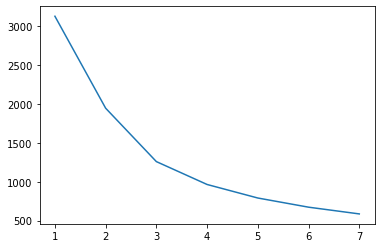

In [30]:
# write your code here
plt.plot(range(1,8), wcss)

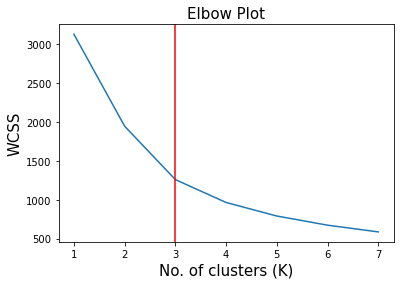

In [32]:
plt.plot(range(1,8), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# plot a vertical line at the elbow
plt.axvline(x = 3, color = 'red')

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the silhouette coefficient for the number of clusters from 2 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

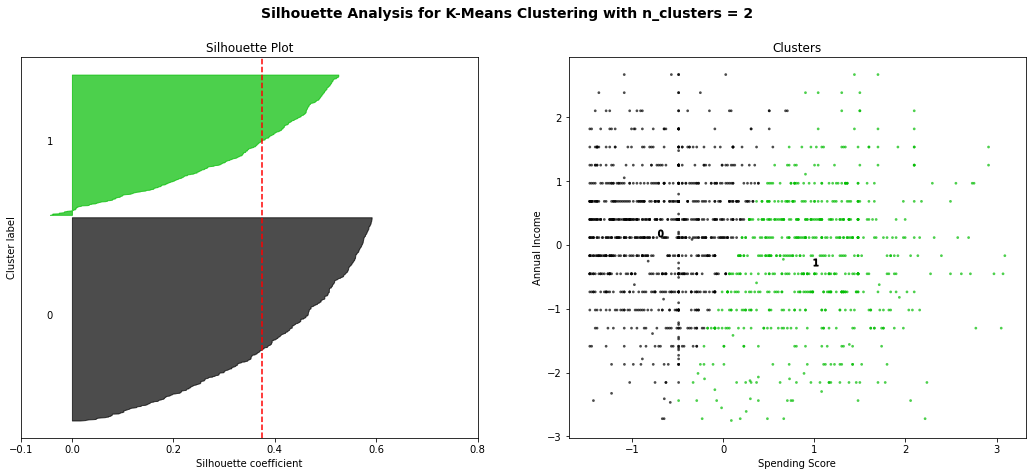

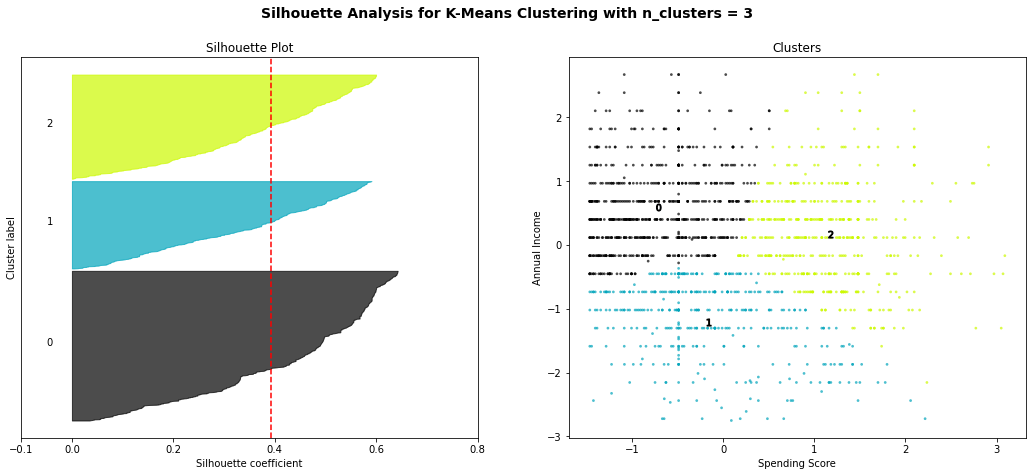

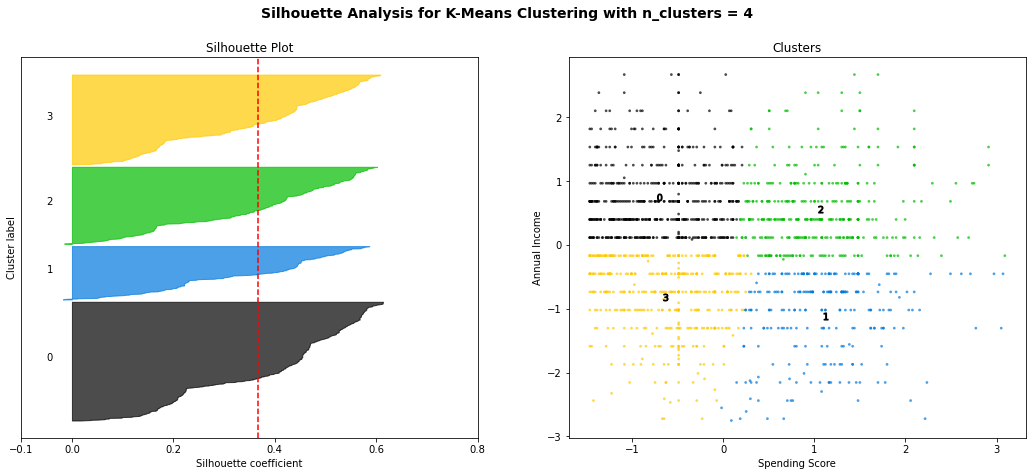

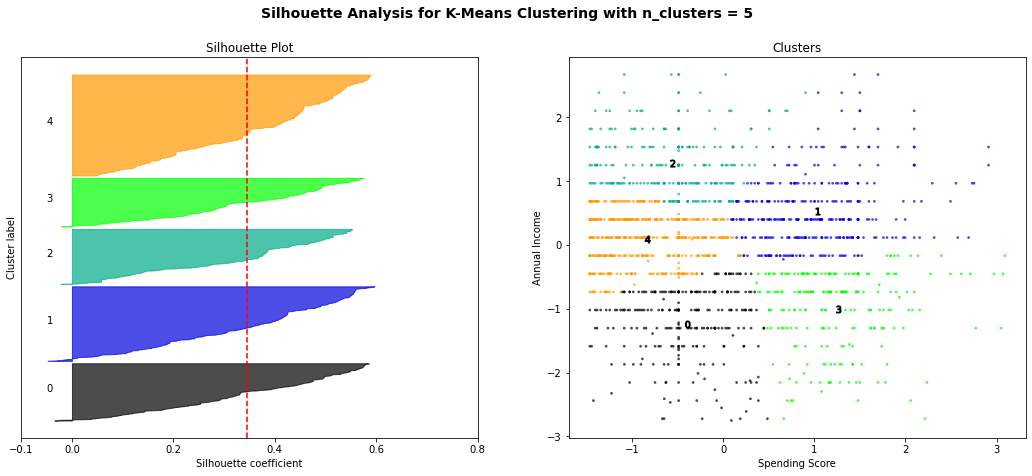

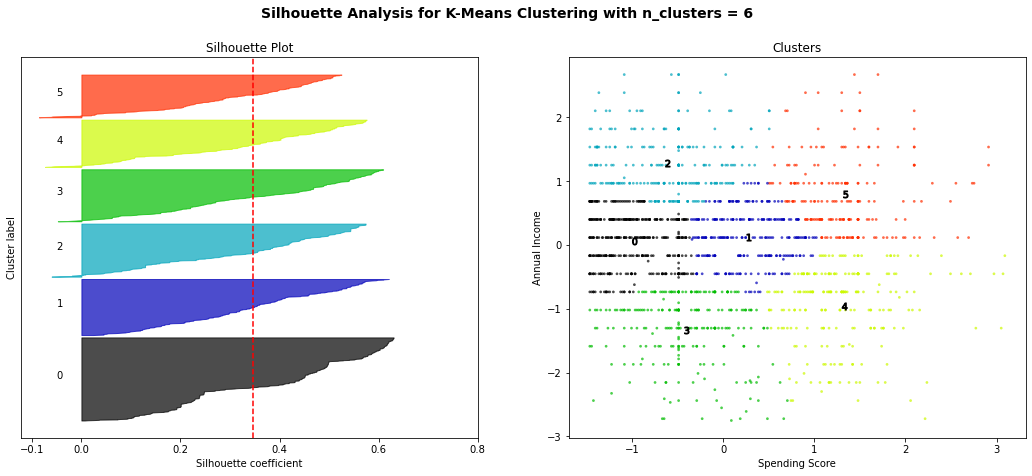

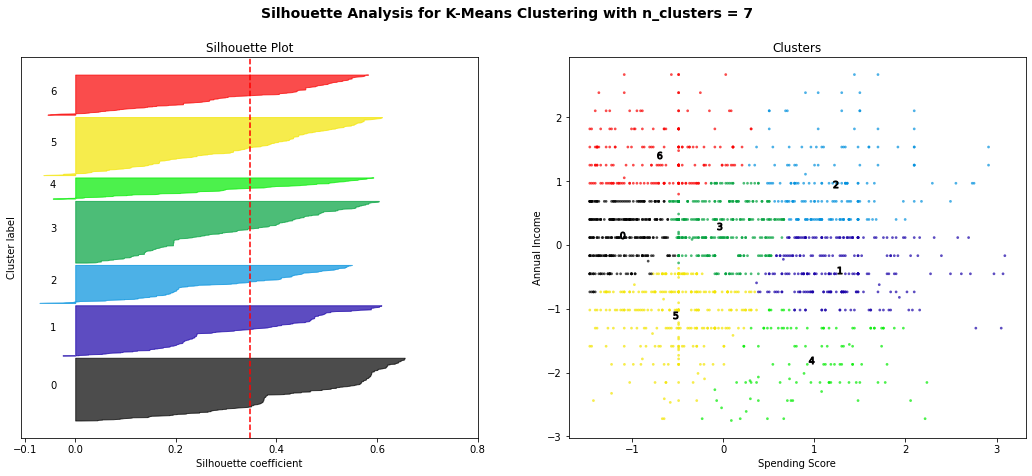

In [38]:
# write your code here
# consider the number of clusters
import matplotlib.cm as cm
n_clusters = [2,3,4,5,6,7]

# consider an array of the data
X = np.array(X)

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:
    
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # set the figure size
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 10)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(X)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()
        
        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])  
    
    # set the ticks for x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    # 2nd plot showing the actual clusters formed
    # consider different color for each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    # plot a scatter plot to visualize the clusters
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label the cluster centers
    centers = model.cluster_centers_
    
    # display the cluster center with cluster number
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # add the axes and plot title
    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    ax2.set_ylabel("Annual Income")
    
    # set the common title for subplots
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# display the plot
plt.show()

In [39]:
from sklearn.metrics import silhouette_score, silhouette_score

In [41]:
from sklearn.cluster import k_means

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Plot of silhouette coefficients using appropriate graphical method.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# write your code here


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Visualize the silhouette scores using silhouette plot and obtain the clusters for K from 2 to 6.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# write your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Fit K means clustering algorithm with an optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
# write your code here
model=KMeans(n_clusters=3, random_state=10)
model=model.fit(X)
cluster_labels=model.predict(X)
# the 'silhouette_score()' gives the average value for all the samples    
# Compute the silhouette coefficient for each sample
silhauette_avg=silhouette_score(X, cluster_labels)
sample_silhouette_values=silhouette_samples(X, cluster_labels)

<a id="inter"> </a>
## 3. Interpret the Clusters

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Consider the groups formed in the previous question and display the size of each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
# write your code here
df['Cluster']=model.labels_

In [50]:
df.head()

,Latitude,Longitude,DepthMeters,Magnitude,Cluster
0,39.644,-75.483,5000,2.8,1
1,37.379,-80.746,11500,2.8,0
2,45.296,-73.475,18000,2.1,0
3,42.825,-78.239,5000,2.4,1
5,38.675,-80.820,2300,2.4,1


In [51]:
df['Cluster'].value_counts()

1    685
0    477
2    400
Name: Cluster, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Plot the number of observations in each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='Cluster', ylabel='count'>

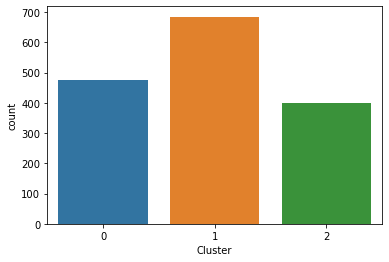

In [54]:
sns.countplot(data= df, x = 'Cluster')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Obtain the centroids of the clusters formed using K-means clustering.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [73]:
# write your code here
centroids = model.cluster_centers_

centroids = pd.DataFrame(centroids , columns=X.columns)

centroids

,DepthMeters,Magnitude
0,1.174746,0.166965
1,-0.719645,0.591926
2,-0.168492,-1.212780


In [70]:
X

array([[-0.48890768,  1.25239414],
       [ 0.80353035,  1.25239414],
       [ 2.09596838, -0.73501951],
       ...,
       [-0.86669725, -0.73501951],
       [ 1.89713176, -0.45110327],
       [ 2.27492133, -0.45110327]])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Obtain the observations belonging to the 1st cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [57]:
# write your code here
#df_cust[df_cust.Cluster==0].describe()
df[df['Cluster']==0].head()

,Latitude,Longitude,DepthMeters,Magnitude,Cluster
1,37.379,-80.746,11500,2.8,0
2,45.296,-73.475,18000,2.1,0
6,38.818,-80.430,17000,2.5,0
7,38.792,-80.398,10700,2.5,0
12,44.964,-74.588,17000,2.4,0


In [58]:
df[df['Cluster']==0].describe()

,Latitude,Longitude,DepthMeters,Magnitude,Cluster
count,477.000000,477.000000,477.000000,477.000000,477.0
mean,40.314354,-78.646559,13366.939203,2.417694,0.0
std,2.546376,3.250720,2846.765942,0.272955,0.0
min,37.179900,-82.548100,8300.000000,1.600000,0.0
25%,38.033300,-81.583500,11300.000000,2.200000,0.0
50%,39.697000,-80.485000,13100.000000,2.400000,0.0
75%,42.589000,-74.979500,14900.000000,2.600000,0.0
max,45.296000,-73.190000,23000.000000,3.300000,0.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the observations belonging to the 2nd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
# write your code here
df[df['Cluster']==1].head()

,Latitude,Longitude,DepthMeters,Magnitude,Cluster
0,39.644,-75.483,5000,2.8,1
3,42.825,-78.239,5000,2.4,1
5,38.675,-80.820,2300,2.4,1
8,39.433,-81.362,5000,2.8,1
9,41.514,-80.333,5000,2.7,1


In [62]:
df[df['Cluster']==1].describe()

,Latitude,Longitude,DepthMeters,Magnitude,Cluster
count,685.000000,685.000000,685.000000,685.000000,685.0
mean,39.070120,-80.180605,3839.562044,2.567372,1.0
std,1.997227,2.657267,2515.001619,0.229455,0.0
min,37.050000,-82.616800,100.000000,2.200000,1.0
25%,37.800700,-81.979700,1500.000000,2.400000,1.0
50%,38.058200,-81.498000,3700.000000,2.500000,1.0
75%,40.204800,-78.973700,5600.000000,2.700000,1.0
max,45.290000,-73.249000,10000.000000,3.300000,1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Obtain the observations belonging to the 3rd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
# write your code here
df[df['Cluster']==2].head()

,Latitude,Longitude,DepthMeters,Magnitude,Cluster
10,40.859,-74.179,2000,2.1,2
14,40.011,-74.796,5000,1.9,2
18,41.035,-73.543,4300,2.1,2
19,39.509,-77.190,6000,2.2,2
23,41.075,-74.222,5000,2.0,2


In [64]:
df[df['Cluster']==2].describe()

,Latitude,Longitude,DepthMeters,Magnitude,Cluster
count,400.000000,400.000000,400.000000,400.000000,400.0
mean,40.522600,-77.891643,6611.450000,1.931725,2.0
std,2.407889,3.259108,3683.651261,0.211741,0.0
min,37.007700,-82.825500,100.000000,1.390000,2.0
25%,38.072225,-81.467325,4200.000000,1.800000,2.0
50%,40.317100,-77.212500,6000.000000,2.000000,2.0
75%,42.917800,-74.528075,8772.500000,2.100000,2.0
max,45.300900,-73.063400,18600.000000,2.230000,2.0
